## Module 4 Practice - Heat Maps



This practice notebook has exercises for plotting heat maps using R and ggplot library.



A heat map is a 2D graphical representation of data where the individual values contained in a matrix are represented as colors. There are different types of heat maps used in different disciplines, each referred to by the term “heat map”, even though they use different visualization techniques. 

Go back to the familiar Kings county data for house prices. Plot a heat map for showing the distribution of houses between floors and the year in which the house is built. The thick red tiles represent larger number of built and white tiles represent small number of houses built.

In [1]:
library(ggplot2)
kc_house_data = read.csv("../../../datasets/house_sales_in_king_county/kc_house_data.csv")

Below table command gives the distribution of every combination of houses for yr_built and floors. **`yr_built_floors`** dataframe has yr_built, floors and Freq that represents frequency. 

In [3]:
yr_built_floors = as.data.frame(table(kc_house_data$yr_built,kc_house_data$floors))

In [4]:
str(yr_built_floors)

'data.frame':	696 obs. of  3 variables:
 $ Var1: Factor w/ 116 levels "1900","1901",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 6 levels "1","1.5","2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  26 8 5 12 22 20 32 17 37 34 ...


In below heat map, the color scheme suggests red tiles are the larger number of houses built and white tiles are smaller number of houses built.

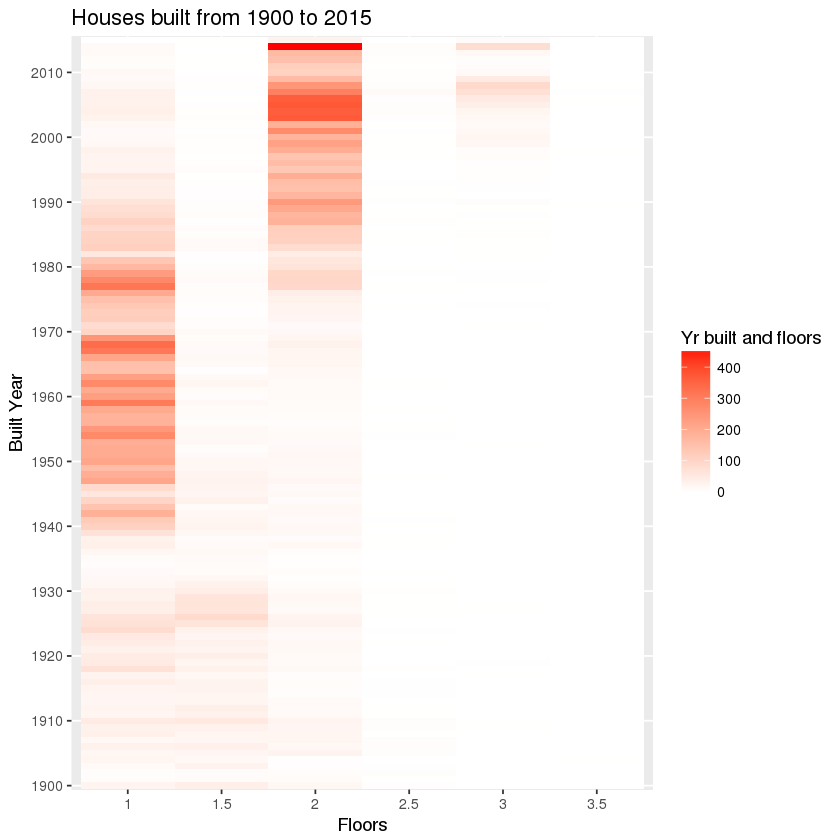

In [5]:
ggplot(yr_built_floors,aes(x=Var2,y=Var1)) + geom_tile(aes(fill=Freq)) +   
    scale_fill_gradient(name="Yr built and floors",low="white",high="red") + 
    scale_y_discrete(breaks=c(seq(1900,2020,by=10)))+xlab("Floors")+ylab("Built Year")+labs(title="Houses built from 1900 to 2015")

----
Heat maps are more frequently used with **`geospatial maps`**. Generate the map for **`seattle`** and overlay a density heat map on it. 

get_map() in **`ggmap`** will fetch you the geospatial map of the supplied location. It queries Google Maps, OpenStreetMap, Stamen Maps or Naver Map servers for a map. The location can be an address, longitude/latitude pair (in that order), or left/bottom/right/top bounding box. 

**Reference: **


- [ggmap](https://www.rdocumentation.org/packages/ggmap/versions/2.6.1/topics/ggmap)
- [get_map()](https://www.rdocumentation.org/packages/ggmap/versions/2.6.1/topics/get_map)

In [6]:
table(is.na(kc_house_data$long))


FALSE 
21613 

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Seattle&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle&sensor=false
Warning message:
“Removed 9373 rows containing missing values (geom_point).”

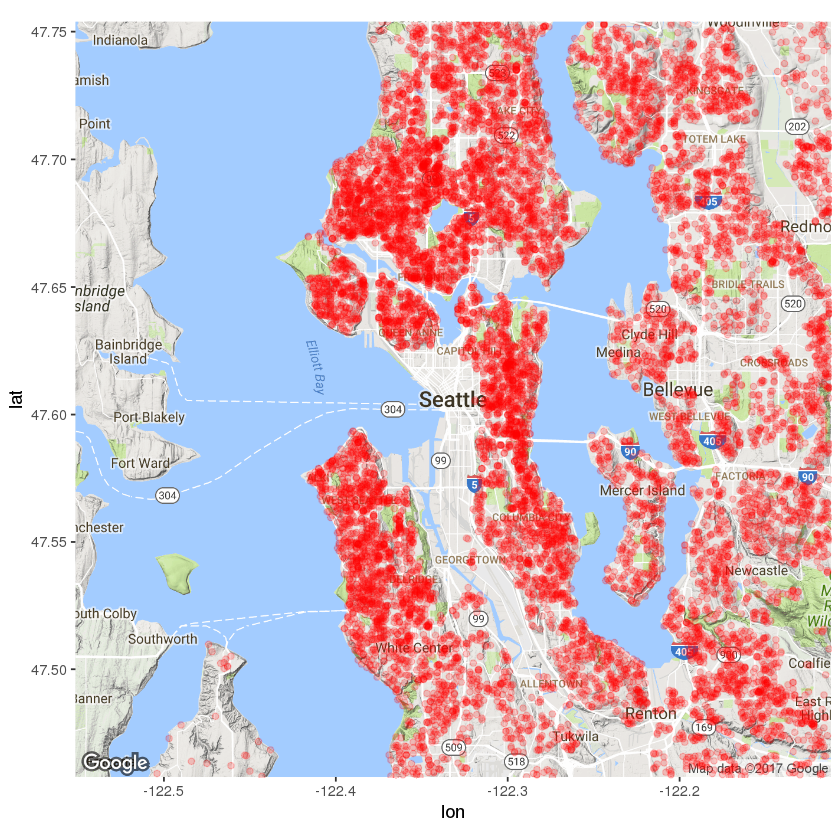

In [7]:
library(ggmap)
kc_map_outline <- get_map(location='Seattle', zoom=11)
kc_map <- ggmap(kc_map_outline)
kc_map <- kc_map + geom_point(data=kc_house_data, aes(x=long, y=lat), inherit.aes=FALSE,color='red', alpha=0.2)
kc_map

**`geom_density2d`** in below code will draw the 2d contours based on the density of data points. The number of contours around a region is proportional to density of points. **`stat_density2d`** will show the heat based on nuber of data points. The map is shaded red if the number of data points are more in the region and yellow otherwise. 

**Rerefence:**

- [geom_density2d](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.1/topics/geom_density2d)
- [stat_density2d](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.1/topics/stat_density2d)

Warning message:
“Removed 9373 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 9373 rows containing non-finite values (stat_density2d).”

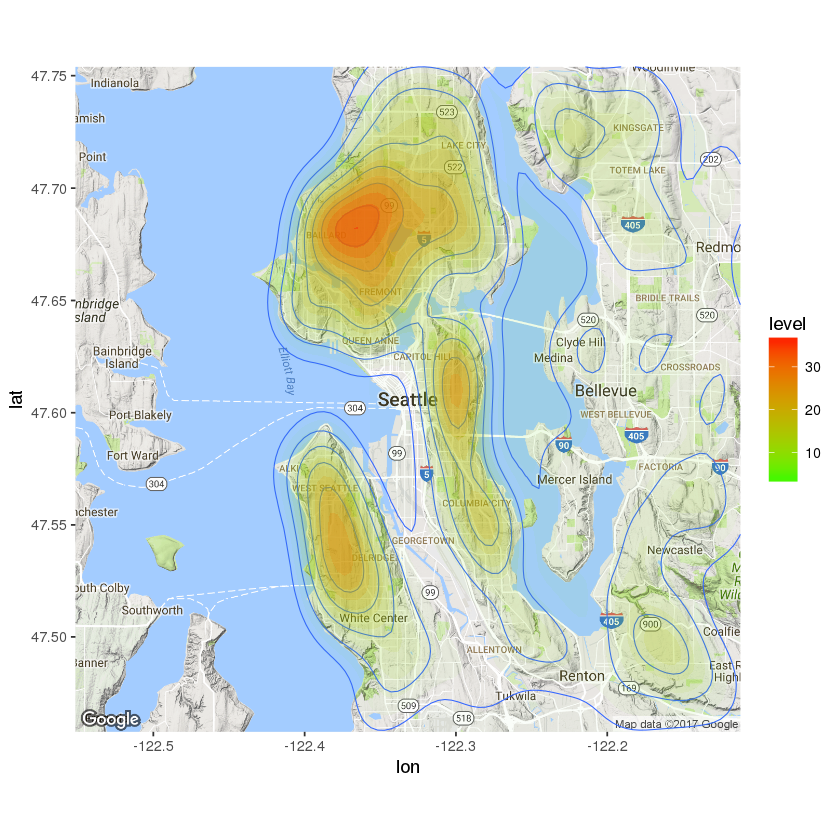

In [8]:
ggmap(kc_map_outline) + 
geom_density2d(data = kc_house_data, aes(x = long, y = lat), size = 0.3) + 
stat_density2d(data = kc_house_data, aes(x = long, y = lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0, 0.3), guide = FALSE)

Below plot is a scatter plot where size of the data point indicates the price of the house. A contant **`circle_scale_amt = 0.000001`** is used to calculate the size of the circle. 

Warning message:
“Removed 9373 rows containing missing values (geom_point).”

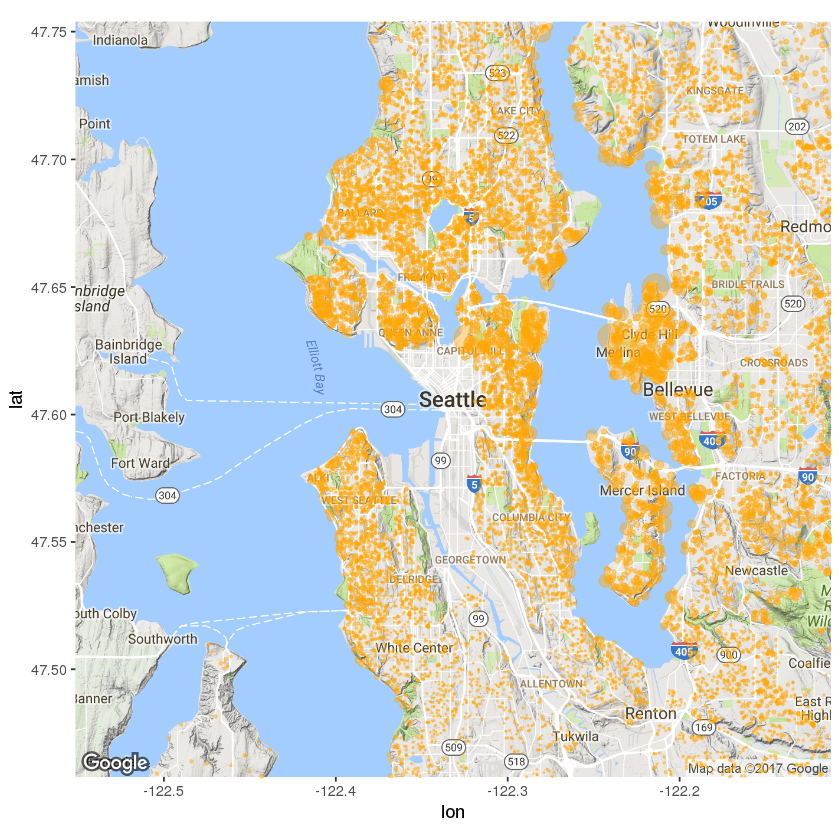

In [9]:
circle_scale_amt = 0.000001
ggmap(kc_map_outline) + 
    geom_point(data=kc_house_data, aes(x=long, y=lat),col="orange",alpha=0.4, size=kc_house_data$price*circle_scale_amt) + 
    scale_size_continuous(range=range(kc_house_data$price))